# Isotropic smoothing of image via Heat equation

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from skimage import color
from skimage import io

## load input image
- filename for the input image is 'barbara_color.jpeg'

In [2]:
 
I0 = io.imread('barbara_color.jpeg')

## check the size of the input image

In [3]:
I0.shape

(512, 512, 3)

In [4]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  512
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image

In [5]:
I = color.rgb2gray(I0)

In [6]:
I.shape

for i in range(len(I.shape)):
    print(I.shape[i])

512
512


In [7]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
I = color.rgb2gray(I0)

num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  512
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [8]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
I = (I-I.min()) / (I.max() - I.min())
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [9]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    temp = np.zeros(I.shape)

    for i in range(len(I)-1):
        temp[i,:] = I[i+1,:]
    temp[-1,:] = I[-1,:]
    
    D = temp-I
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

In [31]:
temp = np.pad(I,pad_width = (1,1),mode="edge")

In [33]:
test = np.array([
    [1,2,3,4,5],
    [3,4,2,1,3],
    [6,6,1,23,1],
    [5,1,3,1,3],
    [6,1,4,2,1]
])

In [35]:
temp = np.pad(test,pad_width = (1,1),mode='constant')
temp

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  0],
       [ 0,  3,  4,  2,  1,  3,  0],
       [ 0,  6,  6,  1, 23,  1,  0],
       [ 0,  5,  1,  3,  1,  3,  0],
       [ 0,  6,  1,  4,  2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [36]:
temp2 = np.pad(test,pad_width=(1,1),mode='edge')
temp2

array([[ 1,  1,  2,  3,  4,  5,  5],
       [ 1,  1,  2,  3,  4,  5,  5],
       [ 3,  3,  4,  2,  1,  3,  3],
       [ 6,  6,  6,  1, 23,  1,  1],
       [ 5,  5,  1,  3,  1,  3,  3],
       [ 6,  6,  1,  4,  2,  1,  1],
       [ 6,  6,  1,  4,  2,  1,  1]])

In [47]:
aa = np.array([
    [1,2,3,4,5],
    [6,7,8,9,10],
    [11,12,13,14,15],
    [16,17,18,19,20]
])

In [48]:
res1 = compute_derivative_x_forward(aa)
res1

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [0., 0., 0., 0., 0.]])

In [49]:
xaa = np.roll(aa,-1,axis=0)
xaa

array([[ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [ 1,  2,  3,  4,  5]])

In [51]:
xaa[-1,:] = aa[-1,:]

In [53]:
xaa

array([[ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [16, 17, 18, 19, 20]])

In [54]:
xaa - aa

array([[5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [0, 0, 0, 0, 0]])

In [55]:
def reconstructed_forward(I):
    D = np.zeros(I.shape)
    temp = np.roll(I,-1,axis=0)
    temp[-1,:] = I[-1,:]
    D = temp-I
    return D


In [57]:
res1 = compute_derivative_x_forward(aa)
res2 = reconstructed_forward(aa)

In [58]:
res1

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [0., 0., 0., 0., 0.]])

In [59]:
res2

array([[5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [0, 0, 0, 0, 0]])

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [11]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    temp = np.zeros(I.shape)

    for i in range(1,len(I)):
        temp[i,:] = I[i-1,:]
    
    temp[0,:] = I[0,:]
    D = I-temp
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

In [60]:
aa

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [61]:
res1 = compute_derivative_x_backward(aa)
res1

array([[0., 0., 0., 0., 0.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]])

In [62]:
temp = np.roll(aa,1,axis=0)
temp

array([[16, 17, 18, 19, 20],
       [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [132]:
temp[0,:]=aa[0,:]
temp

array([[ 1,  2,  3,  4,  5],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [133]:
res = temp - aa 
res

array([[0, 0, 0, 0, 0],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5]])

In [134]:
def reconstructed_backward(I):
    D = np.zeros(I.shape)
    temp = np.roll(I,1,axis=0)
    temp[0,:] = I[0,:]

    D =I-temp
    
    return D


In [135]:
res1 = compute_derivative_x_backward(aa)
res2 = reconstructed_backward(aa)

In [136]:
res1

array([[0., 0., 0., 0., 0.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]])

In [137]:
res2

array([[0, 0, 0, 0, 0],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5]])

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [115]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    bb = np.zeros([I.shape[0],I.shape[1]+1])
    
    bb[:,-1] = I[:,-1]
    bb[:,0:-1]=I[:,:]


    partial1 = bb[:,0:-1]
    partial2 = bb[:,1:]

    D = partial2-partial1
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

In [131]:
aa

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [139]:
test1 = np.roll(aa,-1,axis=1)
test2 = np.roll(aa,1,axis=1)
test1

array([[ 2,  3,  4,  5,  1],
       [ 7,  8,  9, 10,  6],
       [12, 13, 14, 15, 11],
       [17, 18, 19, 20, 16]])

In [147]:
test2[:,0]=aa[:,0]
test2

array([[ 1,  1,  2,  3,  4],
       [ 6,  6,  7,  8,  9],
       [11, 11, 12, 13, 14],
       [16, 16, 17, 18, 19]])

In [148]:
test1[:,-1]=aa[:,-1]
test1

array([[ 2,  3,  4,  5,  5],
       [ 7,  8,  9, 10, 10],
       [12, 13, 14, 15, 15],
       [17, 18, 19, 20, 20]])

In [152]:
res1 = test1-aa
res2 = aa-test2

In [153]:
res1 

array([[1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0]])

In [154]:
res2

array([[0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1]])

In [163]:
def reconstructed_y_forward(I):
    D = np.zeros(I.shape)
    temp1 = np.roll(I,-1,axis=1)
    temp1[:,-1] = I[:,-1]

    D = temp1-I
    return D

In [164]:
res1 = compute_derivative_y_forward(aa)
res2 = reconstructed_y_forward(aa)

In [165]:
res1

array([[1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.]])

In [166]:
res2

array([[1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0]])

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [116]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    bb = np.zeros([I.shape[0],I.shape[1]+1])
    bb[:,0] = I[:,0]
    bb[:,1:]=I 

    partial1 = bb[:,:-1]
    partial2 = bb[:,1:]

    D = partial2 - partial1   
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

In [185]:
def reconstructed_y_backward(I):
    D = np.zeros(I.shape)
    temp = np.roll(I,1,axis=1)
    temp[:,0]=I[:,0]

    D = I - temp
    return D

In [186]:
res1 = compute_derivative_y_backward(aa)
res2 = reconstructed_y_backward(aa)

In [187]:
res1

array([[0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.]])

In [188]:
res2

array([[0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1]])

## define a function to compute the laplacian of input matrix
- $\Delta I = \nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}$
- $\Delta I = I[x+1, y] + I[x-1, y] + I[x, y+1] + I[x, y-1] - 4 * I[x, y]$
- $\Delta I$ = derivative_x_forward - derivative_x_backward + derivative_y_forward - derivative_y_backward

In [189]:
def compute_laplace(I):
    
    laplace = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    laplace = reconstructed_forward(I) - reconstructed_backward(I) + reconstructed_y_forward(I)-reconstructed_y_backward(I)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return laplace

## define a function to compute the heat equation of data $I$ with a time step
- $I = I + \delta t * \Delta I$

In [190]:
def heat_equation(I, time_step):
    
    I_update = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_update = I_update + time_step * compute_laplace(I)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

## run the heat equation over iterations

In [191]:
def run_heat_equation(I, time_step, number_iteration):

    I_update = np.zeros(I.shape)

    for t in range(number_iteration):
        # ++++++++++++++++++++++++++++++++++++++++++++++++++
        # complete the blanks
        #
        I_update = I_update + time_step*compute_laplace(I)
    
    
        #
        # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

___

___

## functions for presenting the results

___

___

In [192]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [193]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [194]:
def function_result_03():

    L = compute_laplace(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(L, cmap='gray')
    plt.show()

In [195]:
def function_result_04():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [196]:
def function_result_05():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [197]:
def function_result_06():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [198]:
def function_result_07():

    L = compute_laplace(I)

    value1 = L[0, 0]    
    value2 = L[-1, -1]    
    value3 = L[100, 100]    
    value4 = L[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [199]:
def function_result_08():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [200]:
def function_result_09():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [201]:
def function_result_10():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


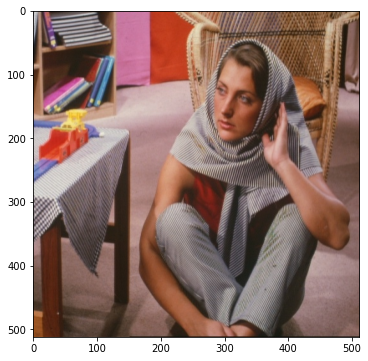

**************************************************
## [RESULT 02]
**************************************************


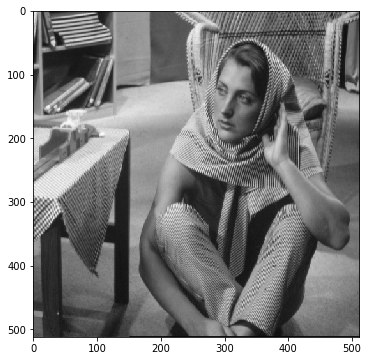

**************************************************
## [RESULT 03]
**************************************************


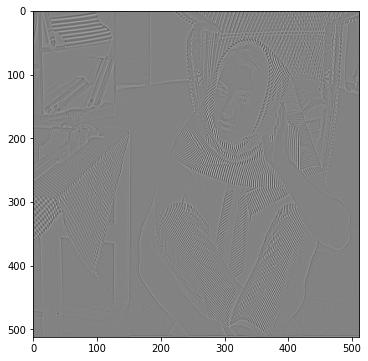

**************************************************
## [RESULT 04]
**************************************************


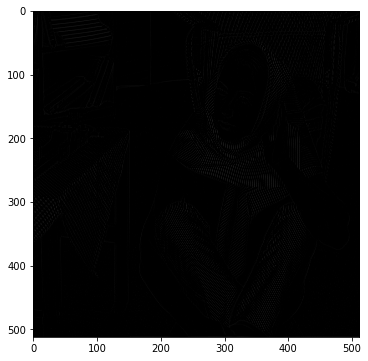

**************************************************
## [RESULT 05]
**************************************************


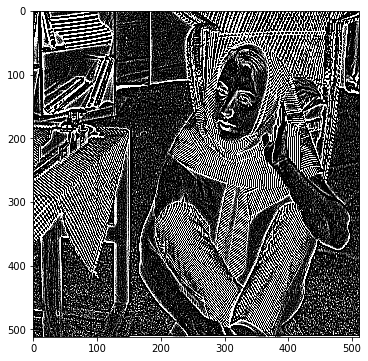

**************************************************
## [RESULT 06]
**************************************************


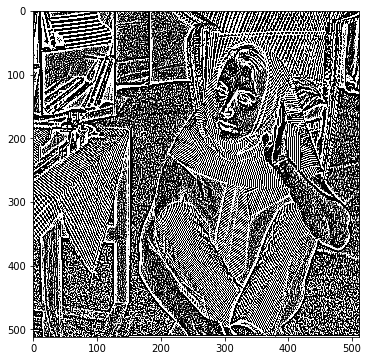

**************************************************
## [RESULT 07]
**************************************************
value1 =  0.38873832902073646
value2 =  0.3503440089528004
value3 =  -0.1205387483392179
value4 =  -0.05899756869858064
**************************************************
## [RESULT 08]
**************************************************
value1 =  0.09718458225518412
value2 =  0.0875860022382001
value3 =  -0.030134687084804476
value4 =  -0.01474939217464516
**************************************************
## [RESULT 09]
**************************************************
value1 =  12.439626528663595
value2 =  11.211008286489621
value3 =  -3.8572399468549743
value4 =  -1.8879221983545753
**************************************************
## [RESULT 10]
**************************************************
value1 =  49.75850611465395
value2 =  44.84403314595816
value3 =  -15.428959787419679
value4 =  -7.551688793418272


In [202]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)